## KP Model Slider graphs

This Notebook creates a slider to scroll through 100 antigenicity values and plot 2000 time points for each.

Ensure this file has access to the '0003_c_sweep_ga_0' folder as it pulls data from those prerun simulations. This is due to each run of 2000 steps take about 50-60s to run.

In [17]:
# slider notebook
%reset -f

# autoreload imports
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import pandas as pd
import csv
import glob
import os
import re

# use the matplotlib widget backend for interactive plots
%matplotlib widget

# import matplotlib for static plots and widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

# import plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

from Visualization.pop_plotting import plot_quad_init, plot_quad_update
from Visualization.data_handling import load_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# get list of files in the output data directory
filepath = glob.glob('Output_data/0003_c_sweep_ga_0/simu_data_0003_c_ga_*_.csv')
print(len(filepath), "files found.")

# function to load data based on antigenicity value
def load_idx(idx: int):
    path = filepath[idx]

    """
    Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
    """
    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data(path)
    return t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness


100 files found.


Reading data from Output_data/0003_c_sweep_ga_0/simu_data_0003_c_ga_1.0194444444444444_.csv


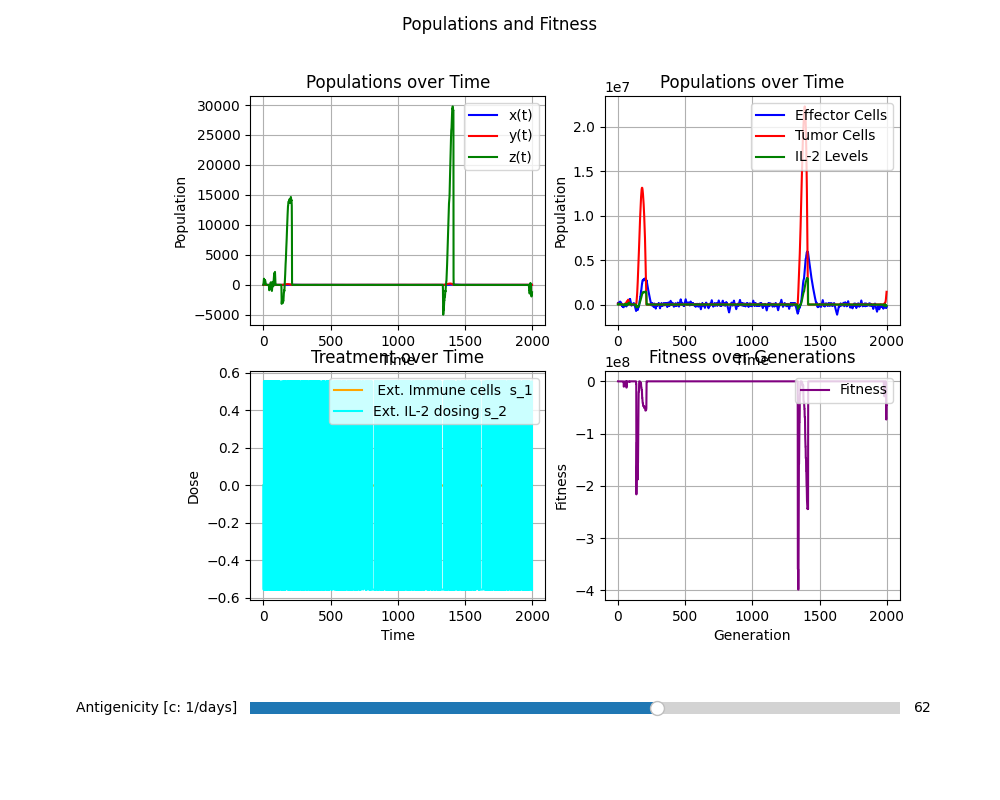

In [19]:
# initial slider value and range
antigenicity_values = np.linspace(-0.005, 0.05, 100)
init_antigenicity = 0.0297
init_idx = int(np.argmin(np.abs(antigenicity_values - init_antigenicity))) # find index closest to initial value

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx(init_idx)

# create the figure and the slider
fig, axes = plot_quad_init()
plot_quad_update(axes, t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# create the antigenicity slider
axslider = fig.add_axes([0.25, 0.1, 0.65, 0.03])

# create the slider
anti_slider = Slider(
    ax=axslider,
    label='Antigenicity [c: 1/days]',
    valmin=0,
    valmax=len(antigenicity_values)-1,
    valinit=init_idx,
    valstep=1,
)

# update function to be called when the slider's value changes
def update(val):
    idx = int(anti_slider.val)
    c_val = antigenicity_values[idx]

    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx(idx)

    for ax in fig.axes:
        ax.cla()  # clear the axis

    plot_quad_update(axes, t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

    fig.canvas.draw_idle()

anti_slider.on_changed(update)
plt.show()